In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Explore the dataset

In [ ]:
df = pd.read_excel("Online Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#information about the dataflame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#number of rows and columns in the df
df.shape

(541909, 8)

In [ ]:
#summary statistics for the dataframe
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
#null values in the dataframe
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0




*   Goals

1.   Which countries are the best selling
2.   What is the effect of unit price to the commodies purchased
3.   How often do customers make purchase




# Which countries are the best selling?

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: sales, dtype: float64


/tmp/ipython-input-872623079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["sales"] = df_clean["Quantity"]*df_clean["UnitPrice"]


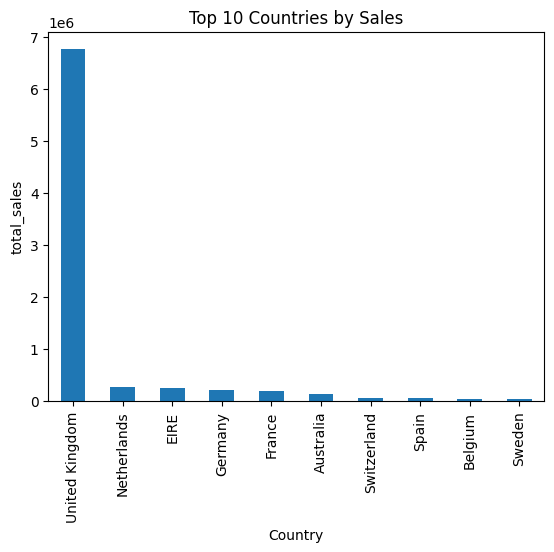

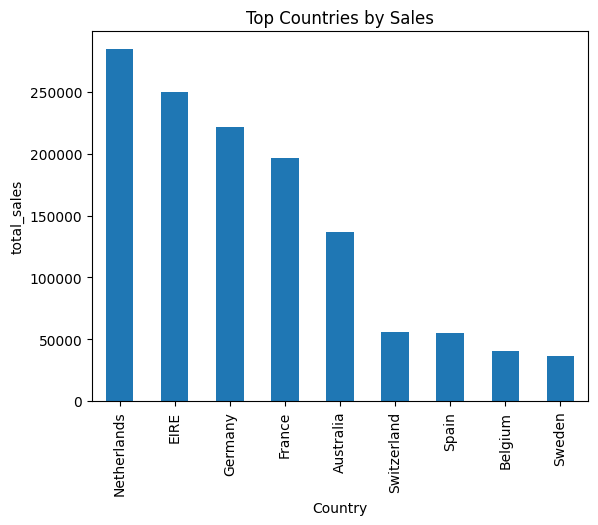

In [ ]:
#excluding missing custumorID rows and getting total sales
df_clean = df.dropna(subset=['CustomerID'])
df_clean["sales"] = df_clean["Quantity"]*df_clean["UnitPrice"]
#total sales by country
total_sales_by_country = df_clean.groupby('Country')['sales'].sum().sort_values(ascending = False)
top_sales = total_sales_by_country.head(10)
print(top_sales)

#visualization
top_sales.plot(kind= 'bar')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('total_sales')
plt.show()
top_sales_excluding_uk = top_sales.drop("United Kingdom")
top_sales_excluding_uk.plot(kind ="bar")
plt.title('Top Countries by Sales')
plt.xlabel('Country')
plt.ylabel('total_sales')
plt.show()

# What is the effect of unit price to the commodies purchased


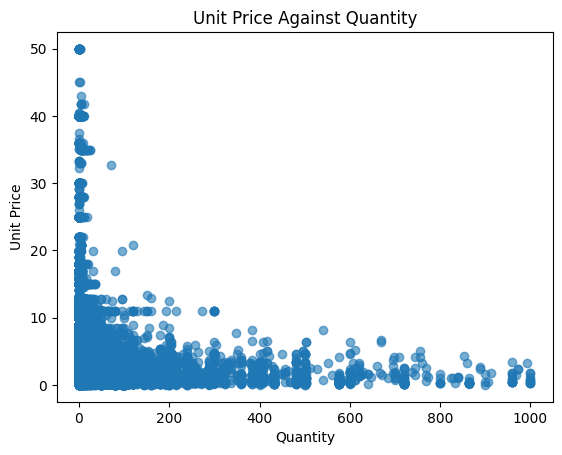

In [ ]:


# Filter the DataFrame to include only positive quantities and a reasonable unit price range
df_positive_quantity = df_clean[(df_clean["Quantity"] > 0) & (df_clean["Quantity"] <= 1000) & (df_clean["UnitPrice"] <50)]

#visualization
plt.scatter(df_positive_quantity["Quantity"],df_positive_quantity["UnitPrice"], alpha=0.6)
plt.title("Unit Price Against Quantity")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.show()